In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
data=pd.read_csv(r"C:\Users\Admin\Desktop\data analyst\s-37 data set\jupiter woking data set\03real estate data set.csv")
data.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904966 entries, 0 to 904965
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          904966 non-null  object 
 1   bed             775126 non-null  float64
 2   bath            791082 non-null  float64
 3   acre_lot        638324 non-null  float64
 4   city            904894 non-null  object 
 5   state           904966 non-null  object 
 6   zip_code        904762 non-null  float64
 7   house_size      612080 non-null  float64
 8   prev_sold_date  445865 non-null  object 
 9   price           904895 non-null  float64
dtypes: float64(6), object(4)
memory usage: 69.0+ MB


In [5]:
data.shape

(904966, 10)

In [6]:
data.isnull().sum()

status                 0
bed               129840
bath              113884
acre_lot          266642
city                  72
state                  0
zip_code             204
house_size        292886
prev_sold_date    459101
price                 71
dtype: int64

In [7]:
missing_values=data.isnull().sum().sort_values(ascending=False)
missing_values

prev_sold_date    459101
house_size        292886
acre_lot          266642
bed               129840
bath              113884
zip_code             204
city                  72
price                 71
status                 0
state                  0
dtype: int64

In [8]:
missing_values_percentage=missing_values/len(data)
missing_values_percentage


prev_sold_date    0.507313
house_size        0.323643
acre_lot          0.294643
bed               0.143475
bath              0.125843
zip_code          0.000225
city              0.000080
price             0.000078
status            0.000000
state             0.000000
dtype: float64

In [9]:
missing_values_percentage=missing_values_percentage.to_frame()
missing_values_percentage

,0
prev_sold_date,0.507313
house_size,0.323643
acre_lot,0.294643
bed,0.143475
bath,0.125843
zip_code,0.000225
city,0.000080
price,0.000078
status,0.000000
state,0.000000


In [10]:
missing_values_percentage.reset_index(inplace=True)
missing_values_percentage=missing_values_percentage.rename(columns={'index':'headings',0:'null_percentage'})
missing_values_percentage

,headings,null_percentage
0,prev_sold_date,0.507313
1,house_size,0.323643
2,acre_lot,0.294643
3,bed,0.143475
4,bath,0.125843
5,zip_code,0.000225
6,city,0.000080
7,price,0.000078
8,status,0.000000
9,state,0.000000


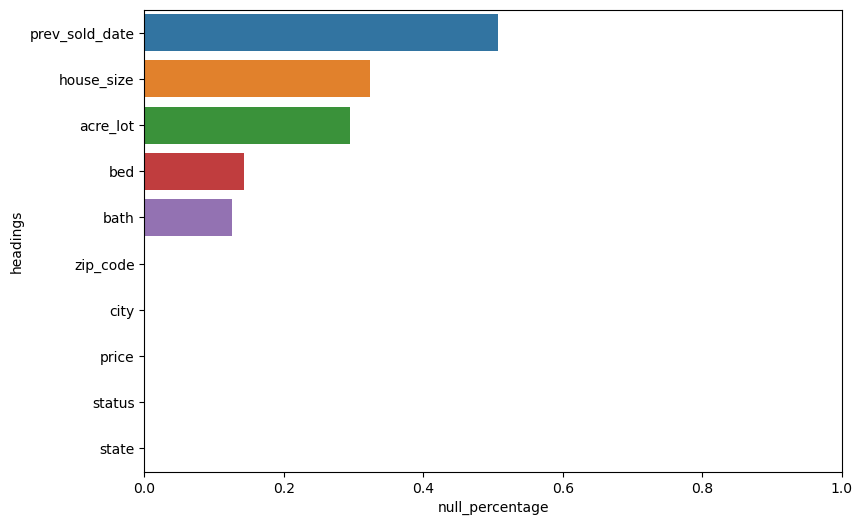

In [11]:
#to check the null value percentage
plt.figure(figsize=(9,6))
sns.barplot(y="headings",x="null_percentage",data=missing_values_percentage)
plt.xlim(0,1)
plt.show()

<Axes: >

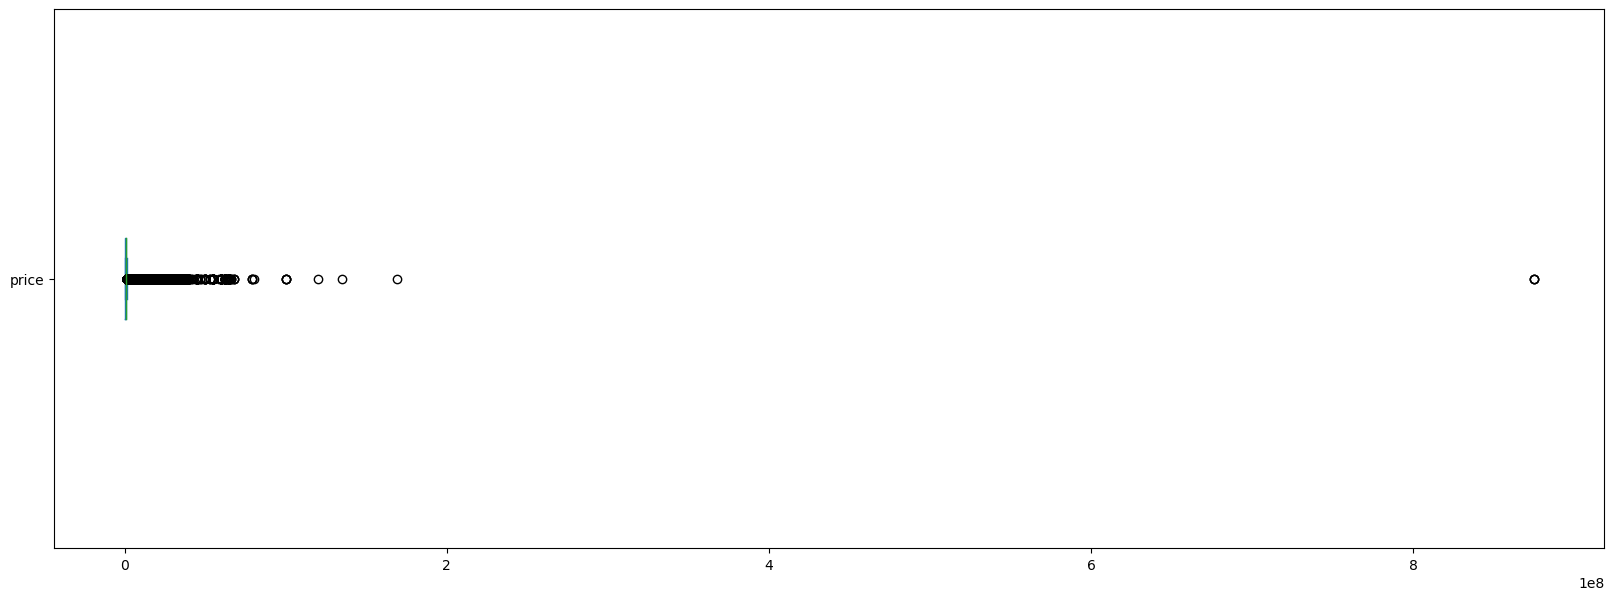

In [12]:
data['price'].plot(kind='box', vert=False, figsize=(20,7))

In [13]:
new_data=data.head(1000)
new_data

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
995,for_sale,NaN,NaN,1.35,Quebradillas,Puerto Rico,678.0,NaN,NaN,105000.0
996,for_sale,NaN,NaN,0.54,Ponce,Puerto Rico,728.0,NaN,NaN,90000.0
997,for_sale,3.0,1.0,0.04,Camuy,Puerto Rico,627.0,1460.0,NaN,69500.0
998,for_sale,4.0,4.0,0.20,Hatillo,Puerto Rico,685.0,1760.0,NaN,144900.0


In [14]:
new_data.dtypes

status             object
bed               float64
bath              float64
acre_lot          float64
city               object
state              object
zip_code          float64
house_size        float64
prev_sold_date     object
price             float64
dtype: object

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

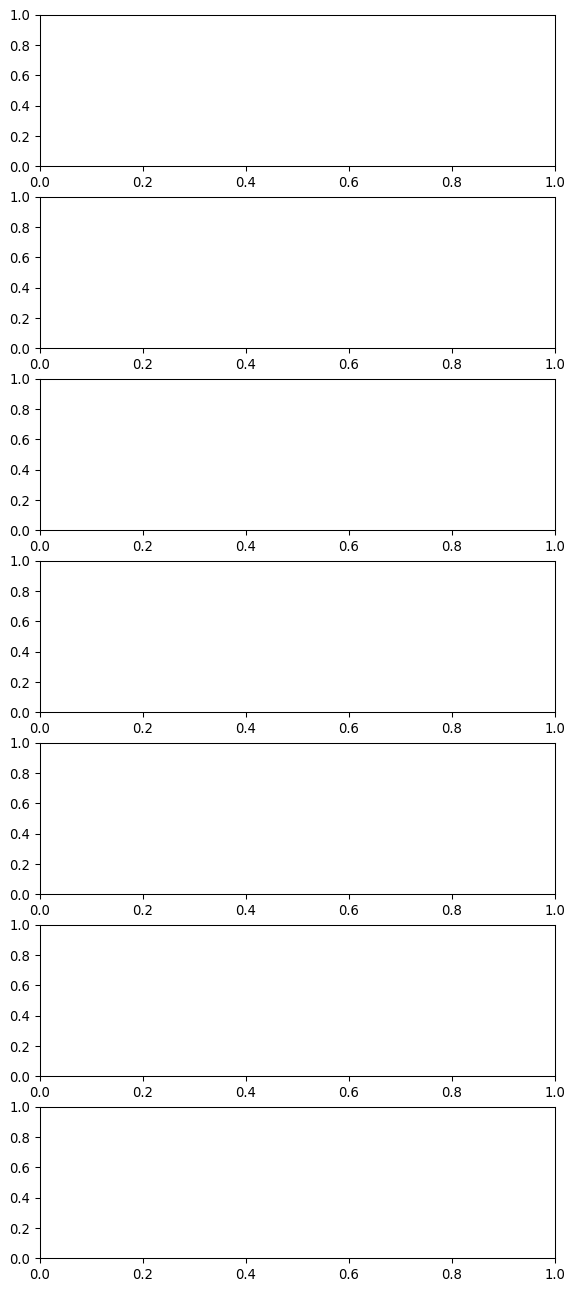

In [15]:
# Box Plots for outliers check
fig, axs = plt.subplots(7,1,dpi=95, figsize=(7,17))
i = 0
col_list = new_data.columns.tolist()
for idx, col in enumerate(col_list):
    if col == 'date':
      pass
    else:
      axs[idx].boxplot(new_data[col], vert=False)
      axs[idx].set_ylabel(col)

plt.show()

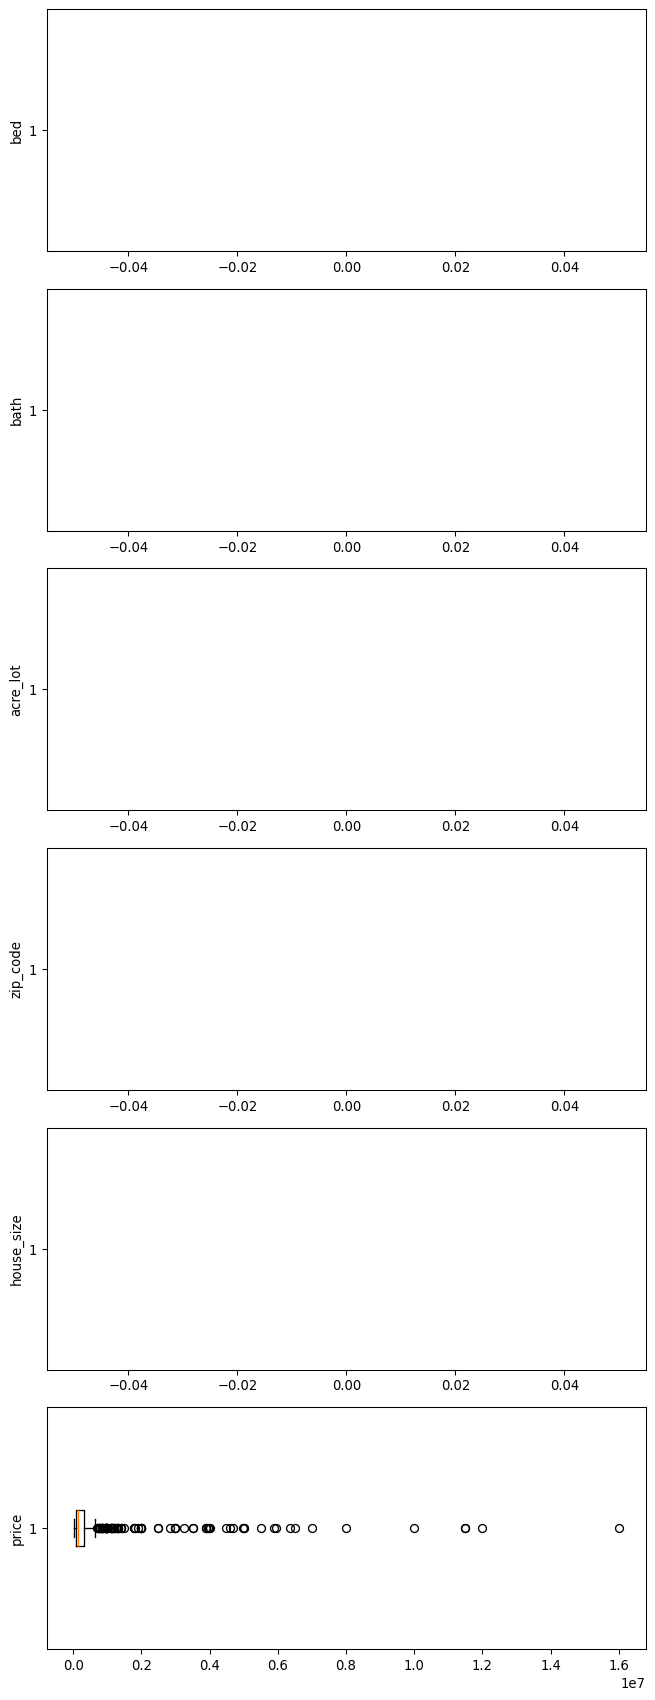

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame named 'new_data' with your data

# Select only numeric columns (excluding 'date')
numeric_cols = new_data.select_dtypes(include=['number']).columns.tolist()

# Create subplots
num_plots = len(numeric_cols)
fig, axs = plt.subplots(num_plots, 1, dpi=95, figsize=(7, 3 * num_plots))

# Loop through numeric columns and create box plots
for idx, col in enumerate(numeric_cols):
    axs[idx].boxplot(new_data[col], vert=False)
    axs[idx].set_ylabel(col)

plt.tight_layout()
plt.show()


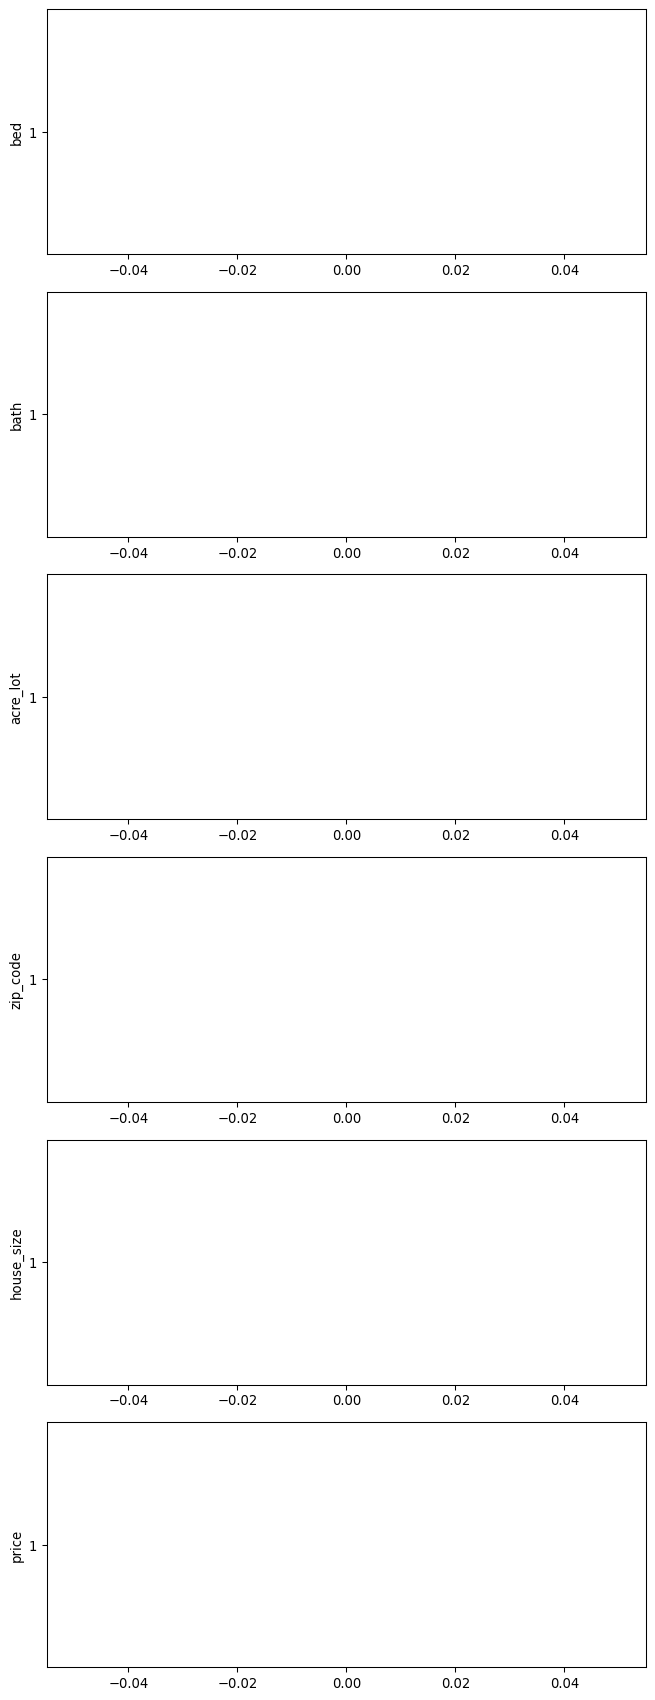

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame named 'new_data' with your data

# Select only numeric columns (excluding 'date')
numeric_cols = data.select_dtypes(include=['number']).columns.tolist()

# Create subplots
num_plots = len(numeric_cols)
fig, axs = plt.subplots(num_plots, 1, dpi=95, figsize=(7, 3 * num_plots))

# Loop through numeric columns and create box plots
for idx, col in enumerate(numeric_cols):
    axs[idx].boxplot(data[col], vert=False)
    axs[idx].set_ylabel(col)

plt.tight_layout()
plt.show()

In [18]:
# data cleaning
# Identify the quartiles
q1, q3 = np.percentile(new_data['acre_lot'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_df = new_data[(new_data['acre_lot'] >= lower_bound)
                & (new_data['acre_lot'] <= upper_bound)]

In [19]:
new_data.shape



(1000, 10)

In [20]:
data.shape

(904966, 10)

In [21]:
data["sq_ft"]=data["acre_lot"]*(100*435.56)
data["price/sq.ft"]=data["price"]/data["sq_ft"]
data

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,sq_ft,price/sq.ft
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0,5226.72,20.089081
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0,3484.48,22.958949
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0,6533.40,10.254997
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0,4355.60,33.290477
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0,2177.80,29.846634
...,...,...,...,...,...,...,...,...,...,...,...,...
904961,for_sale,2.0,2.0,NaN,New York City,New York,10463.0,NaN,13-08-2021,359000.0,NaN,NaN
904962,for_sale,2.0,2.0,NaN,Bronx,New York,10463.0,1200.0,NaN,299000.0,NaN,NaN
904963,for_sale,NaN,1.0,NaN,Bronx,New York,10463.0,NaN,NaN,120000.0,NaN,NaN
904964,for_sale,3.0,2.0,NaN,Bronx,New York,10463.0,NaN,NaN,449000.0,NaN,NaN


In [22]:
# Specify the columns for which you want to check for duplicates
columns_to_check = ['status', 'bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code', 'house_size', 'prev_sold_date', 'price', 'sq_ft', 'price/sq.ft']

# Use the 'duplicated' method to identify duplicate rows based on the specified columns
duplicate_rows = data.duplicated(subset=columns_to_check, keep='first')

# In 'duplicate_rows', True indicates rows that are duplicates

# Use boolean indexing to keep only the rows that are NOT duplicates
filtered_data = data[~duplicate_rows]

# 'filtered_data' now contains rows with unique values in the specified columns

# You can optionally reset the index of 'filtered_data' if needed
filtered_data.reset_index(drop=True, inplace=True)


In [24]:
filtered_data.shape

(110101, 12)

In [25]:
#filtered_data.to_excel("duplicated_removed_real_estate_data_set.xlsx")

In [27]:
filtered_data.columns

Index(['status', 'bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code',
       'house_size', 'prev_sold_date', 'price', 'sq_ft', 'price/sq.ft'],
      dtype='object')

In [28]:
# df.dropna(subset=['bed'], inplace=True)
#leave previous sold data it should be converted to zero or dash
#missed city and state
columns=['status', 'bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code',
       'house_size', 'price', 'sq_ft', 'price/sq.ft']
filtered_data.dropna(subset=columns,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12032\2467357040.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.dropna(subset=columns,inplace=True)


In [29]:
#from 9 lak data droped to 4 lac
filtered_data.shape

(51960, 12)

In [136]:
#data.to_excel("real_estate_check.xlsx",index=False)

In [30]:
filtered_data.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,sq_ft,price/sq.ft
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0,5226.72,20.089081
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0,3484.48,22.958949
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0,6533.40,10.254997
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0,4355.60,33.290477
5,for_sale,4.0,3.0,0.46,San Sebastian,Puerto Rico,612.0,2520.0,NaN,179000.0,20035.76,8.934026


In [31]:
filtered_data.isnull().sum()

status                0
bed                   0
bath                  0
acre_lot              0
city                  0
state                 0
zip_code              0
house_size            0
prev_sold_date    20123
price                 0
sq_ft                 0
price/sq.ft           0
dtype: int64

In [33]:
#data are ok 
filtered_data["bed"].value_counts().sort_index(ascending=True)


bed
1.0      1111
2.0      6547
3.0     20913
4.0     13514
5.0      4849
6.0      2572
7.0       872
8.0       662
9.0       385
10.0      180
11.0       82
12.0      120
13.0       22
14.0       25
15.0       16
16.0       18
17.0        5
18.0       13
19.0        7
20.0        9
21.0        6
22.0        5
23.0        1
24.0        5
27.0        2
28.0        4
30.0        1
31.0        2
32.0        1
33.0        2
36.0        1
40.0        1
42.0        2
47.0        1
49.0        1
60.0        1
86.0        1
99.0        1
Name: count, dtype: int64

In [35]:
filtered_data.to_excel("real_estate_filtered_data.xlsx",index=False)